In [44]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv(r'./features.csv', sep='\t', encoding='utf-8')

In [46]:
df = df.dropna().drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [47]:
print(df.isna().sum())

calories2hr       0
protein2hr        0
sugar2hr          0
carbs2hr          0
calories8hr       0
                 ..
HbA1c             0
Biological Sex    0
CVSD              0
WakeTime          0
label             0
Length: 78, dtype: int64


In [48]:
df.head(30)

,calories2hr,protein2hr,sugar2hr,carbs2hr,calories8hr,protein8hr,sugar8hr,carbs8hr,calories24hr,protein24hr,...,Minfrommid,Hourfrommid,glucose,datetime,ID,HbA1c,Biological Sex,CVSD,WakeTime,label
0,0.0,0.0,0.0,0.0,638.0,17.9,30.7,44.4,1812.0,110.3,...,1053,18,95.0,2020-02-14 17:33:30,1.0,5.5,0,0.17,0.0,1
1,0.0,0.0,0.0,0.0,358.0,13.9,8.7,14.4,1812.0,110.3,...,1058,18,95.0,2020-02-14 17:38:30,1.0,5.5,0,0.19,0.0,1
2,0.0,0.0,0.0,0.0,358.0,13.9,8.7,14.4,1812.0,110.3,...,1063,18,95.0,2020-02-14 17:43:30,1.0,5.5,0,0.09,0.0,1
3,0.0,0.0,0.0,0.0,358.0,13.9,8.7,14.4,1812.0,110.3,...,1069,18,92.0,2020-02-14 17:48:31,1.0,5.5,0,0.11,0.0,1
4,0.0,0.0,0.0,0.0,358.0,13.9,8.7,14.4,1812.0,110.3,...,1073,18,88.0,2020-02-14 17:53:30,1.0,5.5,0,0.12,0.0,1
5,0.0,0.0,0.0,0.0,358.0,13.9,8.7,14.4,1812.0,110.3,...,1078,18,84.0,2020-02-14 17:58:30,1.0,5.5,0,0.09,1.0,0
6,0.0,0.0,0.0,0.0,358.0,13.9,8.7,14.4,1356.0,94.3,...,1083,18,85.0,2020-02-14 18:03:30,1.0,5.5,0,0.11,1.0,1
7,0.0,0.0,0.0,0.0,358.0,13.9,8.7,14.4,1356.0,94.3,...,1088,18,89.0,2020-02-14 18:08:30,1.0,5.5,0,0.12,1.0,1
8,0.0,0.0,0.0,0.0,358.0,13.9,8.7,14.4,1356.0,94.3,...,1093,18,93.0,2020-02-14 18:13:30,1.0,5.5,0,0.10,1.0,1
9,0.0,0.0,0.0,0.0,358.0,13.9,8.7,14.4,1356.0,94.3,...,1098,18,95.0,2020-02-14 18:18:30,1.0,5.5,0,0.16,1.0,1


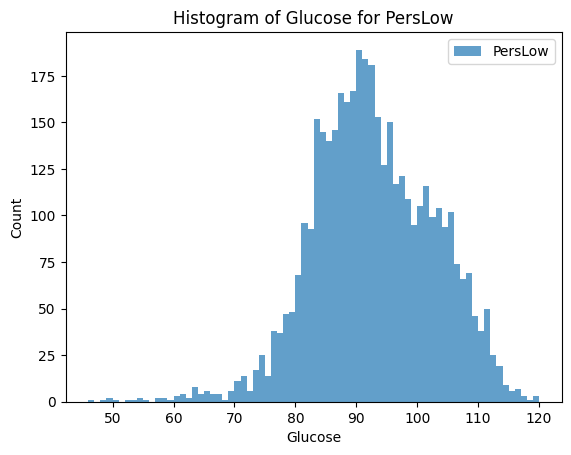

In [49]:
# 데이터프레임에서 특정 클래스 선택
df_perslow = df[df['label'] == 0]

# Bin width 설정
bin_width = 1

# 데이터의 최소값과 최대값을 기반으로 bin의 경계값 계산
min_value = df_perslow['glucose'].min()
max_value = df_perslow['glucose'].max()
bins = np.arange(min_value, max_value + bin_width, bin_width)

# 히스토그램 그리기
plt.hist(df_perslow['glucose'], bins=bins, alpha=0.7, label='PersLow')

# 그래프 제목 및 라벨 설정
plt.title('Histogram of Glucose for PersLow')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend()
plt.show()

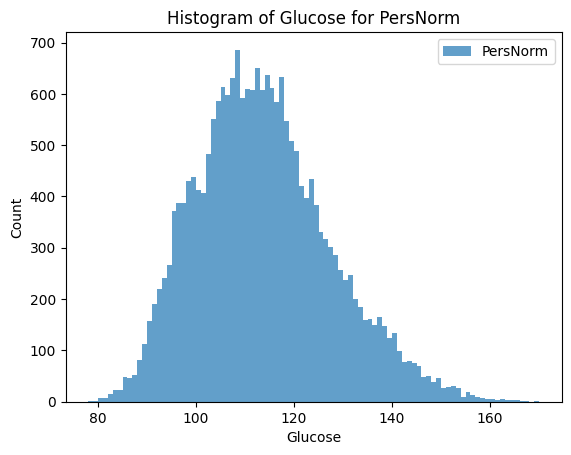

In [50]:
# 데이터프레임에서 특정 클래스 선택
df_persnorm = df[df['label'] == 1]

# Bin width 설정
bin_width = 1

# 데이터의 최소값과 최대값을 기반으로 bin의 경계값 계산
min_value = df_persnorm['glucose'].min()
max_value = df_persnorm['glucose'].max()
bins = np.arange(min_value, max_value + bin_width, bin_width)

# 히스토그램 그리기
plt.hist(df_persnorm['glucose'], bins=bins, alpha=0.7, label='PersNorm')

# 그래프 제목 및 라벨 설정
plt.title('Histogram of Glucose for PersNorm')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend()
plt.show()

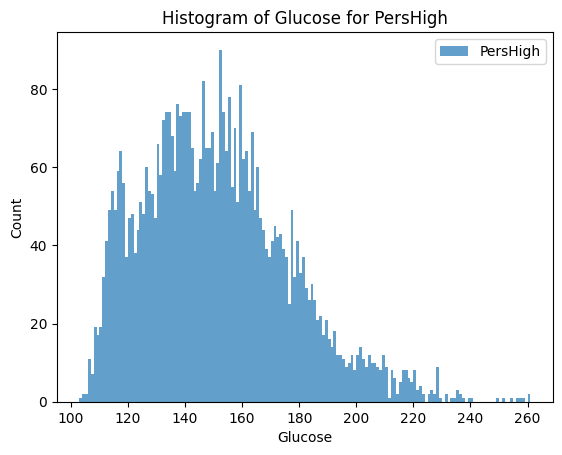

In [51]:
# 데이터프레임에서 특정 클래스 선택
df_pershigh = df[df['label'] == 2]

# Bin width 설정
bin_width = 1

# 데이터의 최소값과 최대값을 기반으로 bin의 경계값 계산
min_value = df_pershigh['glucose'].min()
max_value = df_pershigh['glucose'].max()
bins = np.arange(min_value, max_value + bin_width, bin_width)

# 히스토그램 그리기
plt.hist(df_pershigh['glucose'], bins=bins, alpha=0.7, label='PersHigh')

# 그래프 제목 및 라벨 설정
plt.title('Histogram of Glucose for PersHigh')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend()
plt.show()

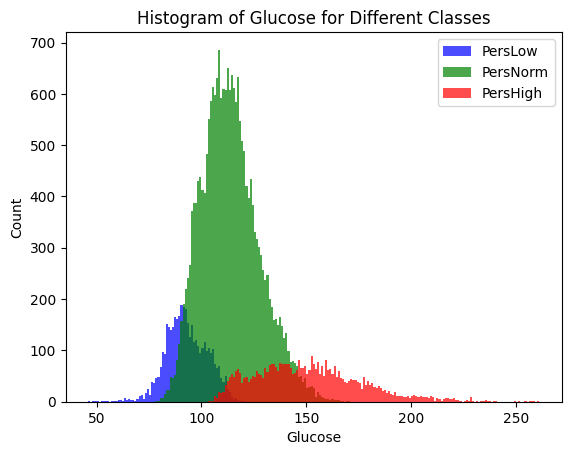

In [52]:
# 데이터프레임에서 특정 클래스 선택
df_perslow = df[df['label'] == 0]
df_persnorm = df[df['label'] == 1]
df_pershigh = df[df['label'] == 2]

# Bin width 설정
bin_width = 1

# 데이터의 최소값과 최대값을 기반으로 bin의 경계값 계산
min_value = min(df_perslow['glucose'].min(), df_persnorm['glucose'].min(), df_pershigh['glucose'].min())
max_value = max(df_perslow['glucose'].max(), df_persnorm['glucose'].max(), df_pershigh['glucose'].max())
bins = np.arange(min_value, max_value + bin_width, bin_width)

# 히스토그램 그리기
plt.hist(df_perslow['glucose'], bins=bins, alpha=0.7, label='PersLow', color='blue')
plt.hist(df_persnorm['glucose'], bins=bins, alpha=0.7, label='PersNorm', color='green')
plt.hist(df_pershigh['glucose'], bins=bins, alpha=0.7, label='PersHigh', color='red')

# 그래프 제목 및 라벨 설정
plt.title('Histogram of Glucose for Different Classes')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend()
plt.show()

In [53]:
# 범위와 왜도 계산 함수
def calculate_range_and_skewness(data):
    data_range = data.max() - data.min()
    data_skewness = skew(data)
    return data_range, data_skewness


In [54]:
# PersLow
perslow_range, perslow_skewness = calculate_range_and_skewness(df_perslow['glucose'])
print(f'PersLow - Range: {perslow_range}, Skewness: {perslow_skewness}')

# PersNorm
persnorm_range, persnorm_skewness = calculate_range_and_skewness(df_persnorm['glucose'])
print(f'PersNorm - Range: {persnorm_range}, Skewness: {persnorm_skewness}')

# PersHigh
pershigh_range, pershigh_skewness = calculate_range_and_skewness(df_pershigh['glucose'])
print(f'PersHigh - Range: {pershigh_range}, Skewness: {pershigh_skewness}')

PersLow - Range: 74.0, Skewness: -0.2086421065020723
PersNorm - Range: 92.0, Skewness: 0.4805626543389289
PersHigh - Range: 158.0, Skewness: 0.6592551081867085
